In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

repo_dir = os.getcwd() + '/repo'
tft_dir = os.path.join(repo_dir, 'tft')
os.chdir(tft_dir)

import warnings  
warnings.filterwarnings('ignore')

In [2]:
!ls

 carriage_services.csv		     'outputs_mobiact(v2)_swa'
 data_formatters		     'outputs_mobiact(v2)_swa2'
 data_formatters.zip		     'outputs_mobiact(v2)(undersampling)'
 dlr_preprocessed		     'outputs_mobiact(v2)_wo_pinfo'
 dlr_tft_results		      outputs_mobiact_wo_age
 ETTm1.csv			      outputs_mobiact_wo_gender
 ETTm2.csv			      outputs_mobiact_wo_known
 expt_settings			      outputs_mobiact_wo_known_no_bioinfo
 expt_settings.zip		      outputs_mobiact_wo_known_no_bioinfo2
 libs				      outputs_notchFall
 libs.zip			     'outputs_notchFall(oversampling)'
 mobiact_dataset		      outputs_notchFall_swa
 MobiAct_Dataset_v2.0.rar	     'outputs_notchFall(undersampling)'
 MobiAct_Dataset_v2-Copy1.0.rar       outputs_pm2.5
 mobiact_preprocessed		      outputs_smartFall
 MobiAct_preprocessed.zip	     'outputs_smartFall(oversampling)'
 mobi_tft_wo_known_no_bioinfo	      outputs_smartFall_swa
 mobi_tft_wo_known_results	     'outputs_smartFall(undersampling)'
 notch_dataset			      outputs_st

In [3]:
output_folder = os.path.join(os.getcwd(), 'outputs_ET')   # Root folder to save experiment outputs
force_download = False 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
ettm1 = pd.read_csv('ETTm1.csv', parse_dates = True, index_col=0)
ettm2 = pd.read_csv('ETTm2.csv', parse_dates = True, index_col=0)
ettm1.head()

HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999
2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000
2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001

In [4]:
ettm1_year, ettm1_month, ettm1_day, ettm1_hour, ettm1_min = list(), list(), list(), list(), list()
for i in range(len(ettm1.index)):
    ettm1_year.append(ettm1.index[i].year)
    ettm1_month.append(ettm1.index[i].month)
    ettm1_day.append(ettm1.index[i].day)
    ettm1_hour.append(ettm1.index[i].hour)
    ettm1_min.append(ettm1.index[i].minute)
    
ettm2_year, ettm2_month, ettm2_day, ettm2_hour, ettm2_min = list(), list(), list(), list(), list()
for i in range(len(ettm2.index)):
    ettm2_year.append(ettm1.index[i].year)
    ettm2_month.append(ettm1.index[i].month)
    ettm2_day.append(ettm1.index[i].day)
    ettm2_hour.append(ettm1.index[i].hour)
    ettm2_min.append(ettm1.index[i].minute)

In [5]:
ettm1['year'] = ettm1_year
ettm1['month'] = ettm1_month
ettm1['day'] = ettm1_day
ettm1['hour'] = ettm1_hour
ettm1['minute'] = ettm1_min
ettm1['time'] = ettm1.index
ettm1['id'] = '1'
ettm1['region'] = 'region1'

ettm2['year'] = ettm2_year
ettm2['month'] = ettm2_month
ettm2['day'] = ettm2_day
ettm2['hour'] = ettm2_hour
ettm2['minute'] = ettm2_min
ettm2['time'] = ettm2.index
ettm2['id'] = '2'
ettm2['region'] = 'region2'

In [6]:
ettm1.head(), ettm1.tail()

(                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT  \
 date                                                                       
 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000   
 2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999   
 2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000   
 2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000   
 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001   
 
                      year  month  day  hour  minute                time id  \
 date                                                                         
 2016-07-01 00:00:00  2016      7    1     0       0 2016-07-01 00:00:00  1   
 2016-07-01 00:15:00  2016      7    1     0      15 2016-07-01 00:15:00  1   
 2016-07-01 00:30:00  2016      7    1     0      30 2016-07-01 00:30:00  1   
 2016-07-01 00:45:00  2016      7    1     0      45 2016-07-01 

In [7]:
ettm2.head(), ettm2.tail()

(                          HUFL    HULL       MUFL   MULL   LUFL   LULL  \
 date                                                                     
 2016-07-01 00:00:00  41.130001  12.481  36.535999  9.355  4.424  1.311   
 2016-07-01 00:15:00  39.622002  11.309  35.543999  8.551  3.209  1.258   
 2016-07-01 00:30:00  38.868000  10.555  34.365002  7.586  4.435  1.258   
 2016-07-01 00:45:00  35.518002   9.214  32.569000  8.712  4.435  1.215   
 2016-07-01 01:00:00  37.528000  10.136  33.936001  7.532  4.435  1.215   
 
                             OT  year  month  day  hour  minute  \
 date                                                             
 2016-07-01 00:00:00  38.661999  2016      7    1     0       0   
 2016-07-01 00:15:00  38.223000  2016      7    1     0      15   
 2016-07-01 00:30:00  37.344002  2016      7    1     0      30   
 2016-07-01 00:45:00  37.124001  2016      7    1     0      45   
 2016-07-01 01:00:00  37.124001  2016      7    1     1       0   
 
  

In [8]:
train_start = dt.datetime(2016, 7, 1, 0, 0)
train_end = dt.datetime(2017, 6, 30, 23, 45)

valid_start = dt.datetime(2017, 7, 1, 0, 0)
valid_end = dt.datetime(2018, 1, 31, 23, 45)

test_start = dt.datetime(2018, 2, 1, 0, 0)
test_end = dt.datetime(2018, 6, 26, 19, 45)

In [9]:
ettm1_train = ettm1.loc[train_start: train_end]
ettm1_valid = ettm1.loc[valid_start: valid_end]
ettm1_test = ettm1.loc[test_start: test_end]

ettm2_train = ettm2.loc[train_start: train_end]
ettm2_valid = ettm2.loc[valid_start: valid_end]
ettm2_test = ettm2.loc[test_start: test_end]

In [10]:
train = pd.concat([ettm1_train, ettm2_train], axis=0)
valid = pd.concat([ettm1_valid, ettm2_valid], axis=0)
test = pd.concat([ettm1_test, ettm2_test], axis=0)

In [11]:
from data_formatters.base import GenericDataFormatter, DataTypes, InputTypes

# View avialable inputs and data types.
print("Available data types:")
for option in DataTypes:
    print(option)

print()
print("Avaialbe input types:")
for option in InputTypes:
    print(option)

Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME


In [12]:
print(train.columns)
train.head()

Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT', 'year', 'month',
       'day', 'hour', 'minute', 'time', 'id', 'region'],
      dtype='object')


HUFL   HULL   MUFL   MULL   LUFL   LULL         OT  \
date                                                                       
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000   
2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999   
2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000   
2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000   
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001   

                     year  month  day  hour  minute                time id  \
date                                                                         
2016-07-01 00:00:00  2016      7    1     0       0 2016-07-01 00:00:00  1   
2016-07-01 00:15:00  2016      7    1     0      15 2016-07-01 00:15:00  1   
2016-07-01 00:30:00  2016      7    1     0      30 2016-07-01 00:30:00  1   
2016-07-01 00:45:00  2016      7    1     0      45 2016-07-01 00:45:00  1   
2016-07-01 01:00:00  2016      7    1     1       0 2016-07-01 01:00:00  1   

                      region  
date                          
2016-07-01 00:00:00  region1  
2016-07-01 00:15:00  region1  
2016-07-01 00:30:00  region1  
2016-07-01 00:45:00  region1  
2016-07-01 01:00:00  region1

In [23]:
from libs import utils 
import sklearn.preprocessing
class StockFormatter(GenericDataFormatter):
    _column_definition = [
        ('id', DataTypes.CATEGORICAL, InputTypes.ID),
        
        ('time', DataTypes.DATE, InputTypes.TIME),
        
        ('year', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        ('month', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        ('day', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        ('hour', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        ('minute', DataTypes.REAL_VALUED, InputTypes.KNOWN_INPUT),
        
        ('HUFL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('HULL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('MUFL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('MULL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('LUFL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('LULL', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        
        
        ('OT', DataTypes.REAL_VALUED, InputTypes.TARGET),
        ('region', DataTypes.CATEGORICAL, InputTypes.STATIC_INPUT)
    ]
    
    def __init__(self):
        """initializes formatter"""
        
        self.identifiers = None
        self._real_scalers = None
        self._cat_scalers = None
        self._target_scaler = None
        self._num_classes_per_cat_input = None
    
    def split_data(self, train, valid, test):
        """
        split data frame into training-validation-test data frames
        
        """
        print('Formatting train-valid-test splits.')
        
        
        self.set_scalers(train)
        
        return (self.transform_inputs(data) for data in [train, valid, test])
    
    def set_scalers(self, df):
        """
        Calibrates scalers using the data supplied.
        (제공된 데이터를 사용해서 scaler 교정)

        Args:
          df: Data to use to calibrate scalers.
        """
        print('Setting scalers with training data...')
        
        column_definitions = self.get_column_definition()

        id_column = utils.get_single_col_by_input_type(InputTypes.ID,
                                                       column_definitions)
        target_column = utils.get_single_col_by_input_type(InputTypes.TARGET,
                                                           column_definitions)
        # extract identifiers in case required
#         stock에는 identifier가 현재 따로 필요해보이지 않음(데이터 entity가 한개이기 때문)
        self.identifiers = list(df[id_column].unique())
        
        # Format real scalers
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        data = df[real_inputs].values
        self._real_scalers = sklearn.preprocessing.StandardScaler().fit(data)
        
        # target데이터를 prediction에 사용
        self._target_scaler = sklearn.preprocessing.StandardScaler().fit(df[[target_column]].values)
        
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        categorical_scalers = {}
        num_classes = []
        for col in categorical_inputs:
            srs = df[col].apply(str)
            categorical_scalers[col] = sklearn.preprocessing.LabelEncoder().fit(srs.values)
            num_classes.append(srs.nunique())
        
        # set categorical scaler outputs
        self._cat_scalers = categorical_scalers
        self._num_classes_per_cat_input = num_classes
        
    def transform_inputs(self, df):
        """
        performs feature transformations.
        
        feature engineering, preprocessing and normalization을 포함
        
        Args:
            df - data frame to transform.
            
        Returns:
            Transformed data frame.
        """
        output = df.copy()
        
        if self._real_scalers is None and self._cat_scalers is None:
            raise ValueError('Scalers have not been set!')
        
        column_definitions = self.get_column_definition()
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME}
        )
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        output[real_inputs] = self._real_scalers.transform(df[real_inputs].values)
        for col in categorical_inputs:
            string_df = df[col].apply(str)
            output[col] = self._cat_scalers[col].transform(string_df)
        return output
    
    def format_predictions(self, predictions):
        output = predictions.copy()
        
        column_names = predictions.columns
        for col in column_names:
            if col not in {'forecast_time', 'identifier'}:
                output[col] = self._target_scaler.inverse_transform(predictions[col])
                
        return output
    
    def get_fixed_params(self):
        fixed_params = {
            'total_time_steps': 21,     # Total width of the Temporal Fusion Decoder
            'num_encoder_steps': 20,    # Length of LSTM decoder (ie. # historical inputs)
            'num_epochs': 100,            # Max number of epochs for training
            'early_stopping_patience': 5, # Early stopping threshold for # iterations with no loss improvement
            'multiprocessing_workers': 5  # Number of multi-processing workers
        }
        
        return fixed_params
    
    def get_default_model_params(self):
        model_params = {
            'dropout_rate': 0.3,
            'hidden_layer_size': 160,
            'learning_rate': 0.01,
            'minibatch_size': 64,
            'max_gradient_norm': 0.01,
            'num_heads': 1,
            'stack_size': 1
        }

        return model_params

In [24]:
data_formatter = StockFormatter()
train, valid, test = data_formatter.split_data(train, valid, test)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration(
  )

Formatting train-valid-test splits.
Setting scalers with training data...


In [25]:
train.head()

HUFL      HULL      MUFL      MULL      LUFL  \
date                                                                    
2016-07-01 00:00:00 -1.006395 -0.824586 -1.000700 -0.945243  0.639133   
2016-07-01 00:15:00 -1.009965 -0.813830 -1.005118 -0.951783  0.656314   
2016-07-01 00:30:00 -1.009965 -0.835342 -1.005118 -0.958141  0.647864   
2016-07-01 00:45:00 -1.009965 -0.835342 -1.005118 -0.951783  0.647864   
2016-07-01 01:00:00 -1.013535 -0.813830 -1.005118 -0.951783  0.621952   

                         LULL        OT      year     month       day  \
date                                                                    
2016-07-01 00:00:00  0.347451  0.731904 -0.991814  0.137469 -1.673503   
2016-07-01 00:15:00  0.357342  0.725745 -0.991814  0.137469 -1.673503   
2016-07-01 00:30:00  0.342586  0.689139 -0.991814  0.137469 -1.673503   
2016-07-01 00:45:00  0.342586  0.426738 -0.991814  0.137469 -1.673503   
2016-07-01 01:00:00  0.352478  0.493878 -0.991814  0.137469 -1.673503   

                         hour    minute                time id  region  
date                                                                    
2016-07-01 00:00:00 -1.661325 -1.341641 2016-07-01 00:00:00  1       0  
2016-07-01 00:15:00 -1.661325 -0.447214 2016-07-01 00:15:00  1       0  
2016-07-01 00:30:00 -1.661325  0.447214 2016-07-01 00:30:00  1       0  
2016-07-01 00:45:00 -1.661325  1.341641 2016-07-01 00:45:00  1       0  
2016-07-01 01:00:00 -1.516862 -1.341641 2016-07-01 01:00:00  1       0

In [26]:
import libs.hyperparam_opt
import libs.tft_model
import libs.utils as util

ModelClass = libs.tft_model.TemporalFusionTransformer
data_params = data_formatter.get_experiment_params()
param_ranges = ModelClass.get_hyperparm_choices()

In [27]:
model_params = {'dropout_rate': 0.3,      # Dropout discard rate
                'hidden_layer_size': 320, # Internal state size of TFT
                'learning_rate': 0.01,   # ADAM initial learning rate
                'minibatch_size': 512,    # Minibatch size for training
                'max_gradient_norm': 100.,# Max norm for gradient clipping
                'num_heads': 4,           # Number of heads for multi-head attention
                'stack_size': 1           # Number of stacks (default 1 for interpretability)
               }

In [28]:
model_folder = os.path.join(output_folder, 'saved_models', 'ET_output', 'fixed')
model_params['model_folder'] = model_folder

model_params.update(data_params)

In [29]:
HyperparamOptManager = libs.hyperparam_opt.HyperparamOptManager
print("*** Loading hyperparm manager ***")
opt_manager = HyperparamOptManager(param_ranges, data_params, model_folder)

*** Loading hyperparm manager ***


In [30]:
success = opt_manager.load_results()
restart_opt = 'yes'
if success and not restart_opt:
    print("Loaded results from previous training")
else:
    print("Creating new hyperparameter optimisation")
    opt_manager.clear()

Loading results from /workspace/inkyung/TFT/repo/tft/outputs_ET/saved_models/ET_output/fixed
Creating new hyperparameter optimisation


In [31]:
import tensorflow as tf
from libs.tft_model import TemporalFusionTransformer

# Specify GPU usage
tf_config = utils.get_default_tensorflow_config(tf_device="gpu", gpu_id=2)

Selecting GPU ID=2


In [32]:
tf.compat.v1.get_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:

    tf.compat.v1.keras.backend.set_session(sess)
    params = opt_manager.get_next_parameters()
    # Create a TFT model
    model = TemporalFusionTransformer(model_params,
                                    use_cudnn=True) # Run model on GPU using CuDNNLSTM cells

    # Sample data into minibatches for training
    if not model.training_data_cached():
        model.cache_batched_data(train, "train", num_samples=train_samples)
        model.cache_batched_data(valid, "valid", num_samples=valid_samples)

    # Train and save model
    model.fit()
    
    val_loss = model.evaluate()
    if np.allclose(val_loss, 0.) or np.isnan(val_loss):
        # Set all invalid losses to infintiy.
        # N.b. val_loss only becomes 0. when the weights are nan.
        print("Skipping bad configuration....")
        val_loss = np.inf
    opt_manager.update_score(params, val_loss, model)
    tf.compat.v1.keras.backend.set_session(sess)
    model.save(model_folder)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0e:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.01
# minibatch_size = 512
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_ET/saved_models/ET_output/fixed
# total_time_steps = 21
# num_encoder_steps = 20
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('id', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.DATE: 2>, <InputTypes.TIME: 5>), ('year', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('month', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPU

Cached data "train" updated
Cached data "valid" updated
*** Fitting TemporalFusionTransformer ***
Getting batched_data
Using cached training data
Using cached validation data
Using keras standard fit
Train on 70040 samples, validate on 41240 samples
Epoch 1/100
70040/70040 [==============================] - ETA: 0s - loss: 0.6648WARNING:tensorflow:From /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
70040/70040 [==============================] - 44s 633us/sample - loss: 0.6648 - val_loss: 0.2101
Epoch 2/100
70040/70040 [==============================] - 39s 559us/sample - loss: 0.1828 - val_loss: 0.0967
Epoch 3/100
70040/70040 [==============================] - 39s 560us/sample - loss: 0.0959 - val_loss: 0.08

In [33]:
tf.compat.v1.reset_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    model.load(model_folder)
    
    # Make forecasts
    output_map = model.predict(test, return_targets=True)
    
    targets = data_formatter.format_predictions(output_map["targets"])
    # Format predictions
    
    p50_forecast = data_formatter.format_predictions(output_map["p50"])
    p90_forecast = data_formatter.format_predictions(output_map["p90"])

    def extract_numerical_data(data):
        """Strips out forecast time and identifier columns."""
        return data[[
            col for col in data.columns
            if col not in {"forecast_time", "identifier"}
        ]]
    # Compute Losses
    p50_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p50_forecast),
        0.5)
    p90_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p90_forecast),
        0.9)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0e:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.01
# minibatch_size = 512
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_ET/saved_models/ET_output/fixed
# total_time_steps = 21
# num_encoder_steps = 20
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('id', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.DATE: 2>, <InputTypes.TIME: 5>), ('year', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('month', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPU

Loading model from /workspace/inkyung/TFT/repo/tft/outputs_ET/saved_models/ET_output/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense_12/bias (float32) [1]
[0.]
tensor: TemporalFusionTransformer/dense_12/kernel (float32) [320, 1]
[[ 0.04264756]
 [ 0.03209564]
 [-0.04369352]
 [-0.01701481]
 [-0.12461501]
 [ 0.03796339]
 [ 0.10414709]
 [-0.01605831]
 [ 0.03464189]
 [-0.06814822]
 [ 0.08408576]
 [ 0.1061987 ]
 [-0.11090787]
 [ 0.11767112]
 [ 0.00095193]
 [ 0.11450578]
 [ 0.0485424 ]
 [-0.12834632]
 [ 0.08505856]
 [-0.03745004]
 [ 0.09991083]
 [-0.07995462]
 [ 0.07195683]
 [ 0.11734168]
 [ 0.04783151]
 [ 0.13147043]
 [-0.08811576]
 [ 0.07835811]
 [-0.0631611 ]
 [-0.12519297]
 [-0.05134486]
 [ 0.11183603]
 [ 0.11986558]
 [ 0.09086291]
 [-0.12754309]
 [ 0.06272446]
 [ 0.10559398]
 [ 0.12166129]
 [ 0.09012158]
 [ 0.0011598 ]
 [-0.01129964]
 [-0.10073031]
 [-0.09954265]
 [ 0.093881  ]
 [ 0.04489169]
 [-0.10655735]
 [ 0.11032969]
 [ 0.06363596]
 [ 0.02559386]
 [-0.11

tensor: TemporalFusionTransformer/layer_normalization_29/gamma (float32) [320]
[1.1150136  0.85904425 0.86431265 0.05323605 1.0022038  0.8490209
 0.74428385 0.90709656 0.8181843  0.75371414 0.88855106 0.9700242
 0.7971896  0.8651046  0.90540797 0.8035344  0.8355517  0.8693962
 0.98545265 0.6156705  0.87106204 0.95537657 0.7809049  0.8435517
 1.0396386  0.94811594 0.9699242  0.6663502  1.2368414  0.8834416
 0.85622483 0.8395366  0.91061884 0.7891414  1.0963787  0.6867106
 0.90127456 0.83286405 0.8776066  0.0917088  0.7599949  0.9035703
 0.8563027  0.9454298  0.73989767 0.9035691  0.9383628  0.75966686
 0.85172427 0.8121128  0.80328953 0.87979865 0.8934693  1.1310933
 0.96602213 1.0419725  0.8206331  0.73817587 0.91128665 1.0189399
 0.8553235  1.1035831  0.89635724 0.8919529  0.85757786 0.82833576
 0.9373609  0.9014483  0.81956095 0.9057898  1.0042466  0.9160127
 0.8809376  0.8385771  0.8815535  0.93773156 0.7695701  0.85317177
 0.8797407  0.8992569  0.9435624  0.747851   0.931606   0.85

[[-0.01604447  0.0720106  -0.11451039 ...  0.06960686 -0.02395876
   0.10302963]
 [-0.02962942  0.06220639 -0.10196291 ...  0.09739608 -0.06365433
   0.11336548]
 [-0.13234761 -0.09580188 -0.1644338  ... -0.02578474  0.02941415
   0.1034807 ]
 ...
 [ 0.12540646 -0.0307914   0.04802895 ... -0.07333262  0.02917438
   0.11690359]
 [-0.01543635 -0.15137208  0.12202275 ... -0.045096    0.02490823
  -0.00153605]
 [ 0.1725785  -0.06454106  0.04893259 ...  0.01246393  0.17365019
   0.08444493]]
tensor: TemporalFusionTransformer/time_distributed_22/bias (float32) [320]
[-0.06549172 -0.05601967 -0.0562013  -0.0561678   0.07500805  0.0161106
  0.05451525 -0.05994375  0.06465948  0.03000833  0.04408775 -0.06828327
  0.01637555  0.07042094 -0.08565072 -0.05525037  0.06397986  0.05792683
 -0.06211716 -0.0626451  -0.09176961  0.06911328 -0.06426215  0.05514663
  0.03216159  0.06421553 -0.06622843  0.05921033 -0.03338251  0.04481135
 -0.06420877 -0.05231837  0.05445345 -0.060166    0.04510614  0.08033

tensor: TemporalFusionTransformer/time_distributed_52/kernel (float32) [320, 320]
[[-0.03421764 -0.10830406  0.03007596 ... -0.07776003  0.04881934
   0.09832932]
 [ 0.00911636  0.10138146  0.06569261 ...  0.10299672  0.02450683
   0.03007786]
 [-0.04597674  0.05411346  0.04407106 ... -0.00730134  0.01303291
  -0.03817505]
 ...
 [-0.14203256  0.00862206 -0.09708259 ...  0.05336749  0.13357206
   0.01532315]
 [-0.05116976 -0.0115864   0.02037446 ... -0.04697609 -0.15919136
  -0.01990721]
 [-0.14819817 -0.08904783 -0.07623259 ... -0.04724091  0.03456973
   0.12954952]]
tensor: TemporalFusionTransformer/time_distributed_53/bias (float32) [320]
[-1.84213463e-02 -6.76492602e-02 -5.85784577e-02  1.69374180e-04
  8.66210088e-02  3.22829895e-02 -6.76137656e-02 -3.10533009e-02
 -2.02454161e-02 -5.90049885e-02 -1.87432412e-02 -7.63846338e-02
  6.34547174e-02  8.79511535e-02 -3.82279605e-02 -8.22366700e-02
  2.99558975e-02  1.10658472e-02 -7.04674125e-02  4.42649908e-02
 -6.86405078e-02 -4.692598

tensor: TemporalFusionTransformer/time_distributed_90/bias (float32) [320]
[-0.06405164 -0.06193075  0.06731691 -0.05134609  0.0630167   0.03582622
 -0.04856328  0.05393805 -0.10614902 -0.0627133  -0.06038602  0.06005419
  0.066538   -0.05998814 -0.05942264  0.06228069  0.05797847 -0.04769958
 -0.05912465 -0.06408472  0.05920583 -0.06251839  0.06356365  0.06365151
  0.05956965  0.06269187  0.08399899 -0.07227397 -0.06198923  0.06295584
 -0.06255051  0.06145839 -0.05346147 -0.0612151   0.06024874 -0.06186747
 -0.0657445   0.06209484 -0.07366466 -0.06671232 -0.06247503 -0.06244521
 -0.06496247 -0.0568825   0.06077587 -0.06168553  0.05913455 -0.06381291
  0.10524392 -0.06131833  0.06389315  0.06479321 -0.05749187 -0.06002274
 -0.06230069  0.05139994 -0.05516989 -0.06787245 -0.06247511  0.05241789
 -0.06302429  0.03738321  0.05944755  0.04358265 -0.06822994 -0.06563092
  0.03403174 -0.03972219  0.05284871 -0.05986683  0.06047966 -0.06884402
  0.00688396 -0.07077843 -0.05310277 -0.05902483 

INFO:tensorflow:Restoring parameters from /workspace/inkyung/TFT/repo/tft/outputs_ET/saved_models/ET_output/fixed/TemporalFusionTransformer.ckpt
Done.


In [34]:
import datetime as dte
print("Hyperparam optimisation completed @ {}".format(dte.datetime.now()))
print("Best validation loss = {}".format(val_loss))
print("Params:")

# for k in best_params:
#     print(k, " = ", best_params[k])
#     print()
print("Normalised quantile losses: P50={}, P90={}".format(p50_loss.mean(), p90_loss.mean()))

Hyperparam optimisation completed @ 2021-06-29 16:14:35.896409
Best validation loss = 0.044488999968761385
Params:
Normalised quantile losses: P50=0.046280829726645184, P90=0.02223921387096008


<function matplotlib.pyplot.show(close=None, block=None)>

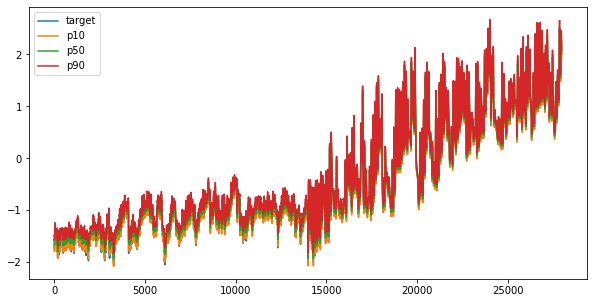

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(output_map['targets']['t+0'], label='target')
plt.plot(output_map['p10']['t+0'], label='p10')
plt.plot(output_map['p50']['t+0'], label='p50')
plt.plot(output_map['p90']['t+0'], label='p90')
plt.legend()
plt.show

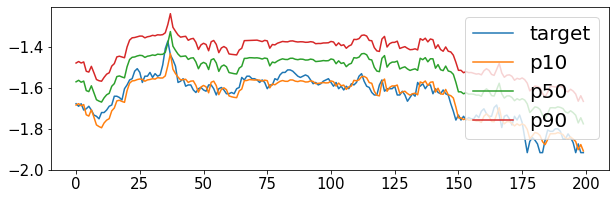

In [43]:
plt.figure(figsize=(10, 3))
plt.plot(output_map['targets']['t+0'][:200], label='target')
plt.plot(output_map['p10']['t+0'][:200], label='p10')
plt.plot(output_map['p50']['t+0'][:200], label='p50')
plt.plot(output_map['p90']['t+0'][:200], label='p90')
plt.legend(loc='upper right', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(-2.0, -1.2, 0.2), fontsize=15)
plt.show()

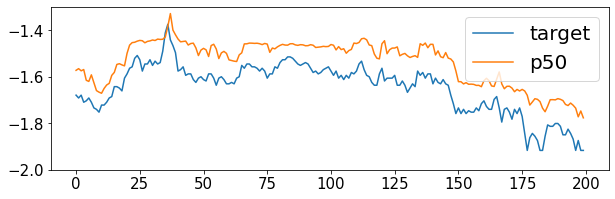

In [44]:
plt.figure(figsize=(10, 3))
plt.plot(output_map['targets']['t+0'][:200], label='target')
plt.plot(output_map['p50']['t+0'][:200], label='p50')
plt.legend(loc='upper right', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(-2.0, -1.2, 0.2), fontsize=15)
plt.show()

In [22]:
# Store outputs in maps
counts = 0
interpretability_weights = {k: None for k in ['decoder_self_attn',
                                              'static_flags', 'historical_flags', 'future_flags']}

tf.compat.v1.get_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    
    tf.compat.v1.keras.backend.set_session(sess)
    
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    
    model.load(model_folder)
    for identifier, sliced in test.groupby('id'):
        
        print("Getting attention weights for {}".format(identifier))
        weights = model.get_attention(sliced)
        
        for k in interpretability_weights:
            w = weights[k]
            
            # Average attentin across heads if necessary
            if k == 'decoder_self_attn':
                w = w.mean(axis=0)
                
                # Store a single matrix for weights to reduce memory footprint
                batch_size, _, _ = w.shape
                counts += batch_size
            
            if interpretability_weights[k] is None:
                interpretability_weights[k] = w.sum(axis=0)
            else:
                interpretability_weights[k] += w.sum(axis=0)
                
interpretability_weight = {k: interpretability_weights[k]/counts for k in interpretability_weights}

print('Done.')

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0e:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.0001
# minibatch_size = 512
# max_gradient_norm = 100.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_carriage_services_w_open/saved_models/carriage_services_w_open/fixed
# total_time_steps = 51
# num_encoder_steps = 50
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('id', <DataTypes.REAL_VALUED: 0>, <InputTypes.ID: 4>), ('days', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('day_of_month', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('Open

dense_79 (Dense)                (None, 51, 80)       25600       layer_normalization_16[0][0]     
__________________________________________________________________________________________________
dense_80 (Dense)                (None, 51, 80)       25600       layer_normalization_16[0][0]     
__________________________________________________________________________________________________
tf_op_layer_TemporalFusionTrans [(None, None, None)] 0           tf_op_layer_TemporalFusionTransfo
__________________________________________________________________________________________________
dense_81 (Dense)                (None, 51, 80)       25600       layer_normalization_16[0][0]     
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 51, 80)       25600       layer_normalization_16[0][0]     
__________________________________________________________________________________________________
dense_83 (

Loading model from /workspace/inkyung/TFT/repo/tft/outputs_carriage_services_w_open/saved_models/carriage_services_w_open/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense_10/bias (float32) [1]
[0.]
tensor: TemporalFusionTransformer/dense_10/kernel (float32) [320, 1]
[[-0.0521136 ]
 [-0.060717  ]
 [-0.05771583]
 [ 0.08278665]
 [ 0.13495348]
 [-0.12005969]
 [ 0.06504281]
 [ 0.03157681]
 [ 0.07217278]
 [-0.09058754]
 [-0.01778335]
 [-0.08627631]
 [-0.02226923]
 [-0.01370401]
 [-0.01263408]
 [-0.08888994]
 [-0.13097961]
 [ 0.08237614]
 [-0.12446979]
 [-0.06254716]
 [-0.08684886]
 [ 0.10495889]
 [-0.094049  ]
 [-0.08749178]
 [ 0.09902966]
 [-0.02500013]
 [ 0.11613865]
 [-0.09945591]
 [-0.11487841]
 [ 0.05673811]
 [-0.11180686]
 [ 0.07301694]
 [-0.06218717]
 [ 0.13160615]
 [-0.04923099]
 [-0.01138721]
 [ 0.01317394]
 [ 0.07499897]
 [-0.10226633]
 [-0.04954831]
 [-0.09639985]
 [-0.03279667]
 [ 0.1167006 ]
 [-0.13533229]
 [ 0.01321723]
 [-0.04728429]
 [-0.13656715]


[[-0.05908212  0.08442716  0.0648455  ... -0.03293822  0.08532697
   0.07680906]
 [-0.09519958 -0.06926813  0.04793499 ... -0.07263914  0.06116379
   0.01889534]
 [-0.0285644   0.02272283  0.03257475 ... -0.02758405 -0.06141251
  -0.03270052]
 ...
 [-0.07637064  0.08725541  0.06931264 ...  0.02068891 -0.02925786
   0.03479187]
 [ 0.0101357  -0.06172212  0.0086856  ...  0.08678853  0.05157785
   0.07710909]
 [ 0.08070675  0.02633234  0.081701   ... -0.07228884  0.03069634
  -0.02026492]]
tensor: TemporalFusionTransformer/dense_17/bias (float32) [320]
[ 4.19481876e-05  7.15874834e-04  6.23710366e-05 -3.01727094e-04
  4.32402740e-04 -7.99416099e-04 -3.27886839e-04  1.96791464e-03
  1.80127716e-03 -1.44962629e-04 -8.57525738e-04  2.32565406e-04
  1.50683697e-03 -5.94480836e-04  8.64185626e-04 -6.88412518e-04
 -1.04173750e-03  8.31139449e-04 -6.79119956e-04  4.84342832e-04
  6.08472419e-06  2.00757757e-03 -6.61807077e-04  5.28887613e-04
 -1.30321586e-03  1.16310839e-03  1.13784254e-03  1.51

[-3.54742137e-04 -2.12122966e-03 -6.43178180e-04 -3.81625630e-03
  3.49753653e-04 -7.86830031e-04  1.13202527e-03  2.71910132e-04
  3.20737227e-03 -5.15925640e-04 -1.13315147e-03 -1.58672652e-03
  4.23741119e-04 -1.62157672e-03  3.07161652e-04  2.13556015e-03
  3.03526089e-04 -1.00057269e-03  3.18896584e-03  4.69267456e-04
 -1.09257456e-03 -1.14256924e-03 -2.25646794e-03 -3.02918907e-03
 -3.08160525e-04 -1.38521020e-03 -1.13478501e-03  1.89021928e-03
 -7.67519407e-04 -3.83957755e-04 -1.14579080e-03  2.20326916e-03
 -5.09511119e-05  2.15623295e-03  1.11223235e-04 -4.12114343e-04
 -7.84855511e-04  6.46164059e-04 -7.93493964e-05  8.04259500e-04
 -2.80856068e-04  1.84221670e-03  5.75566373e-04 -2.21957598e-04
  3.13329790e-03  4.44333942e-04 -6.58020726e-04  4.15304303e-03
  1.32289820e-03 -2.40470472e-04 -4.45575919e-04  2.90865049e-04
  4.78482689e-04  2.61904090e-03 -1.47906691e-03 -1.55698403e-03
  6.22928608e-04  9.03559616e-04  2.35182513e-03  3.95185110e-04
 -1.28924393e-03 -8.83218

[0.]
tensor: TemporalFusionTransformer/dense_6/kernel (float32) [320, 1]
[[ 0.06872918]
 [-0.00394049]
 [-0.04968514]
 [-0.11095194]
 [ 0.08370344]
 [ 0.05437632]
 [-0.13298956]
 [-0.07328651]
 [-0.06696284]
 [-0.10694046]
 [ 0.02604698]
 [-0.1326412 ]
 [-0.1316949 ]
 [ 0.13066201]
 [ 0.1328152 ]
 [-0.05455679]
 [ 0.11373986]
 [-0.05729098]
 [-0.10724565]
 [-0.09368168]
 [ 0.10550705]
 [ 0.01278239]
 [ 0.0663943 ]
 [-0.07199806]
 [ 0.11959799]
 [-0.12556456]
 [-0.00052486]
 [ 0.07820037]
 [-0.07564854]
 [ 0.07935438]
 [-0.08244251]
 [ 0.11122356]
 [ 0.11614735]
 [ 0.02053045]
 [-0.05337269]
 [ 0.10026526]
 [ 0.05541714]
 [-0.07212652]
 [ 0.02269813]
 [-0.0580384 ]
 [ 0.04564749]
 [-0.08757588]
 [-0.03186052]
 [ 0.10385036]
 [-0.01050292]
 [-0.07286589]
 [ 0.1099959 ]
 [-0.01576205]
 [-0.00390698]
 [ 0.08259353]
 [-0.08638048]
 [ 0.03841269]
 [ 0.12682714]
 [ 0.07127084]
 [-0.03557639]
 [-0.07987805]
 [ 0.02791491]
 [-0.0644008 ]
 [-0.03126819]
 [ 0.07596576]
 [ 0.05470797]
 [ 0.0953921

[[-4.26755920e-02 -4.22841609e-02 -2.80313268e-02 -5.12623740e-03
   1.28216678e-02 -2.90026832e-02 -1.80956759e-02  1.27346134e-02
  -4.06184886e-03  2.29593311e-02  2.61833202e-02  3.70021164e-02
  -1.52880959e-02 -2.32625157e-02 -4.34322916e-02 -5.84484031e-03
  -8.86307284e-03  4.56289388e-02  9.74155776e-03 -1.21956598e-02
   1.72905084e-02 -2.44970191e-02  9.69914533e-03 -1.59679037e-02
   3.19287069e-02 -5.18464483e-03 -4.58290353e-02  2.81679947e-02
   3.76620330e-03  1.01573681e-02  1.86556894e-02  3.31362821e-02
  -9.34088510e-03  2.64357198e-02  1.49814300e-02  1.18838716e-02
  -3.85906175e-02 -7.57523376e-05 -3.18357795e-02 -3.93892117e-02
   3.51205952e-02 -1.13086507e-03  5.18055540e-03 -2.62669707e-03
  -2.81866975e-02 -3.51038054e-02  5.29219117e-03  1.25994841e-02
   2.32397206e-02  1.91309322e-02  4.75457795e-02  4.04774584e-02
   1.67361554e-02 -9.45487001e-04  1.18341967e-02 -4.65215631e-02
   4.60811295e-02 -6.89803902e-03  3.28655951e-02  2.31077746e-02
  -4.57069

[ 1.28530475e-04 -2.71895871e-04 -6.49440335e-05  1.98617508e-03
  1.23722747e-03  9.55738826e-04  8.87877773e-04 -2.57089222e-03
 -1.11654680e-03  2.13108331e-04 -1.35856199e-05  1.08671677e-03
  1.09212939e-03  1.41696219e-04  1.46395888e-03  6.32938638e-04
  1.78646110e-03 -8.88944021e-04  7.82906936e-05 -1.12699647e-03
  7.67412363e-04  4.72674350e-04  3.91593465e-04 -7.30443804e-04
 -5.94538651e-05 -3.06538248e-04  1.75913807e-03  2.16471250e-04
 -5.63981303e-04  5.77813305e-04  6.32545707e-05 -3.37661186e-04
 -2.43780305e-04 -3.72642156e-04  6.66394189e-04  1.06754410e-03
  6.99958298e-04 -1.36453207e-04  6.55862968e-04 -2.44169263e-03
  3.46432644e-04 -1.07558374e-03  5.85386006e-04 -6.37600664e-04
 -6.51570212e-04 -1.34430142e-04 -9.75760981e-04  1.43045932e-03
 -4.71345062e-04  1.86805584e-04 -1.24307990e-03 -6.86151208e-04
  5.16762491e-04  7.44457066e-05 -3.51946161e-04 -4.18538075e-05
  1.94873108e-04 -1.28446391e-03  1.02146668e-03 -1.62439956e-03
 -2.35681655e-03  3.97057

[ 1.26185443e-03  2.06939317e-03  1.97745598e-04 -1.51715343e-04
  2.54457438e-04 -5.05129283e-04 -1.43655474e-04  1.29879720e-03
  1.40588405e-03 -1.83024546e-04 -4.81191324e-04  4.89988364e-04
  1.72501488e-03  4.85180091e-04  7.86320132e-04 -5.84224821e-04
 -9.24503664e-04  7.88225327e-04 -5.51205943e-04  5.31493162e-04
 -7.32367989e-05  1.79779797e-03 -2.68039061e-04  6.69360918e-04
 -1.05666707e-03  1.05508708e-03  1.02153351e-03  8.75718019e-04
 -1.39300851e-03  1.69061229e-03 -3.24392720e-04 -7.42340810e-04
 -5.48161159e-04  4.77598747e-04  7.22725890e-05  6.69816916e-04
  4.86575998e-04  9.10380622e-04  9.31879040e-04  5.81325206e-04
 -3.54833028e-04 -4.33318928e-04 -8.91438220e-04  3.41362611e-04
  1.17062987e-03  6.53491821e-04 -7.45112891e-04  5.18310932e-04
 -7.56184978e-04 -6.37574005e-04 -6.04613742e-04 -2.24869218e-05
  2.24806645e-04 -8.66592920e-04 -7.94293883e-04 -8.60998640e-04
 -5.15835010e-04 -1.16840436e-03 -2.75701401e-04  1.58519761e-04
  4.26091428e-04 -9.37037

[-1.08381454e-03  1.22501550e-03  1.27729709e-05 -4.85647070e-05
  2.73057260e-04  4.65378573e-04  2.38806987e-03 -1.80194597e-03
 -1.72530454e-05 -1.63313665e-03 -9.55380907e-04  5.66647330e-04
 -1.40067088e-04  6.66938722e-04  2.93514895e-04 -2.36758686e-04
 -1.04276487e-03  8.67644092e-04 -2.70172884e-03 -2.63868691e-03
 -6.12327713e-04  1.47277140e-03 -4.35079157e-04  3.57408222e-04
 -8.60415050e-04  2.20870436e-03  4.96113033e-04 -2.62961513e-03
  3.28824949e-03  6.78541779e-04  1.16500654e-04  4.26857499e-04
  3.64863430e-04  3.98021541e-04 -2.34173218e-04  7.12039473e-04
 -2.63131340e-04  2.39251138e-04  2.13220227e-03  2.42611184e-03
  2.93063186e-03  6.65595871e-04  5.02358133e-04 -2.74239620e-03
 -1.19233853e-03 -5.12246974e-04  1.95528497e-03  6.82357932e-04
 -4.21055651e-04  1.06661778e-03 -1.28723530e-03 -2.12722621e-03
  3.19281535e-04  8.79487896e-04 -5.93045319e-04  1.92622351e-03
  8.30155623e-04  2.86750775e-03  7.35340582e-04 -1.96424266e-03
 -6.62884486e-05  1.80670

[-2.29680780e-04  3.78998788e-03  1.01122819e-03  1.19324413e-03
  6.26246631e-03 -7.95538537e-04  1.62594614e-03 -7.23435683e-03
 -1.17988442e-03  7.10085791e-04 -4.83731693e-03 -3.19332862e-03
 -1.55264349e-03  3.59964161e-03  2.95269443e-03 -4.82162368e-03
 -2.16681452e-04  4.69436543e-03 -5.56645775e-03 -4.94935503e-03
 -2.61991844e-03  2.24150857e-03 -5.45121031e-04  3.38516920e-03
 -5.61190944e-04  7.21777463e-03 -5.04568103e-04 -6.00503804e-03
  5.97888231e-03  1.52818311e-03  2.33407656e-04 -3.70529783e-03
 -2.81447032e-03 -1.12421205e-03 -1.62063260e-03 -1.09000935e-03
  3.39623285e-03  3.96854244e-03  4.81458101e-03  3.72186606e-03
  6.12885831e-03  1.56925491e-03 -8.65617942e-04 -1.91871182e-03
 -2.68984912e-03  1.25993416e-03  2.65026488e-03  4.66396974e-04
 -1.43376656e-03  2.33598845e-03  6.42621017e-04 -4.00099996e-03
  8.43655900e-04  3.76972486e-03  2.08943384e-03  3.81122925e-03
  1.35464012e-03  3.86606483e-03 -3.15646548e-03 -2.58513587e-03
  1.10307708e-03  3.53945

[ 3.4082273e-04  2.2920780e-03  1.4392973e-03  7.2545512e-04
  5.6805364e-03 -1.2643138e-04  9.9095407e-05 -5.5365516e-03
 -4.1703941e-04  1.6466003e-03 -5.0474619e-03 -1.6907065e-03
 -1.7839264e-03  3.0195834e-03  2.1516141e-03 -3.8403785e-03
 -9.2442869e-04  4.7844360e-03 -5.1014205e-03 -4.7502122e-03
 -1.6954030e-03  3.3224665e-03 -9.1044180e-04  2.9755973e-03
 -1.1750221e-03  6.2258211e-03 -1.1504873e-03 -5.0609191e-03
  3.7789829e-03  3.8157235e-04  9.1660040e-04 -3.2869645e-03
 -1.9758120e-03 -3.8216158e-04 -1.6983458e-03  3.2414933e-04
  3.3215028e-03  2.7862266e-03  3.2841759e-03  3.2400859e-03
  5.0736032e-03  2.9060524e-04 -3.4859907e-04 -2.1183828e-03
 -2.4860553e-03 -5.6365144e-04  2.5554481e-03 -3.3681642e-04
 -2.7672978e-04  2.2004307e-03  1.4295551e-03 -2.9655204e-03
  2.1269987e-03  3.0053966e-03  1.4651780e-03  2.5584528e-03
 -5.6342257e-04  2.2640796e-03 -1.1740731e-03 -1.4016927e-03
  3.6712905e-04  1.9448161e-03  2.0805001e-03  1.4134747e-03
 -1.4947823e-03 -3.28842

[-4.45223600e-03  1.03146501e-03 -1.20612769e-03 -6.28702482e-03
 -3.87092633e-03  3.26289260e-03  3.17012845e-03  1.28709606e-03
  1.23465178e-03 -2.44704797e-03 -2.47304770e-03 -3.87815083e-03
 -3.65615450e-03  4.79328958e-03 -3.23706842e-03 -7.48186663e-04
  4.02504957e-04 -2.89864209e-03  5.55404229e-03 -1.88955467e-03
  1.53747620e-03 -4.56087431e-03  4.11123922e-03  2.74786307e-03
 -3.11406795e-04  7.35852402e-04 -6.72735157e-04 -1.17255287e-04
 -6.78131916e-03 -2.82826275e-03  3.97905521e-03 -2.15000124e-03
  4.66022594e-03 -1.44908798e-03 -1.38934597e-03  3.67743685e-03
  2.96561583e-03 -3.84369679e-03 -1.62427803e-03 -5.17402135e-04
  3.80811398e-03  1.05236750e-03  1.80248928e-03 -1.55805168e-03
  3.93249001e-03 -3.58805468e-04 -9.01797146e-04  5.87879028e-03
  3.52513371e-03  2.07339088e-03  8.54979560e-04  3.27548687e-03
  1.81592477e-03 -9.75963252e-04 -2.73358834e-04 -2.63635349e-03
 -3.77795729e-03  3.28594819e-03 -4.59012575e-03 -5.01885777e-04
  5.27965603e-04  5.43958

[[ 0.0958626   0.04353775  0.03154849  0.1320291   0.04145538  0.12600273
  -0.11856457  0.10355143  0.03145519 -0.09420868 -0.11549637 -0.09738414
   0.12751313  0.1368247  -0.05234398 -0.06427561 -0.12004637  0.09629669
   0.00928294 -0.08649338 -0.05423132 -0.08348812  0.03718337 -0.08210401
  -0.03662129  0.00445616  0.1209181   0.11770135  0.1268117   0.13056275
   0.02541012 -0.00592884  0.01022145  0.0614626  -0.00281202  0.06558538
   0.09654137  0.08238555 -0.01254892  0.0051389  -0.0820678  -0.00444174
  -0.08949672  0.11367059 -0.0349336   0.00951415 -0.07792    -0.08223788
  -0.01297876 -0.12078184 -0.07144971  0.03675675  0.11402085  0.10044201
  -0.1007795   0.11193781 -0.10227257 -0.0812619   0.09119799  0.01298648
  -0.09104398 -0.00763051  0.06994667  0.10469937 -0.12509692 -0.12212317
  -0.02741554  0.08256403 -0.10733537  0.00156849 -0.12537757 -0.03221544
   0.04333631  0.03440177  0.03939653 -0.00995788  0.11819784 -0.10028253
   0.04465019  0.10126106  0.12303303 

[ 4.35520895e-04  4.37986833e-04  2.66315270e-04 -1.70556450e-04
 -6.36817596e-04  5.27937314e-04  1.64647092e-04  5.07300545e-04
 -1.05123164e-03  1.22804462e-03  5.96185506e-04 -2.51795485e-04
  1.82642753e-03 -4.27268242e-04 -5.80573978e-04 -4.83249285e-04
  2.65214359e-04 -7.80870207e-04  4.36888193e-04 -6.12044008e-04
  2.26512348e-05 -1.33490236e-03 -1.26145675e-03 -1.36662158e-03
 -9.30546143e-04  1.34904200e-04 -5.65261114e-04 -4.41025913e-04
  5.28682431e-04 -5.26919728e-04  5.54242288e-05  1.16217486e-03
  9.69191256e-04 -5.98967657e-04  1.29632291e-03  1.34199718e-03
 -9.03831387e-04 -1.08030636e-03  1.00037362e-03 -9.12335599e-06
 -1.51940610e-03  9.96860676e-04 -7.38459348e-05 -1.16925209e-03
  2.00534542e-03 -2.52495054e-04  4.00658231e-04  2.76801758e-04
 -1.44866959e-03 -2.25560647e-03 -3.76229204e-04 -9.03145628e-05
  6.75570554e-05  3.42756248e-05 -2.82794470e-04 -1.66105514e-03
  1.60333526e-04 -4.65310091e-04 -3.33104079e-04 -5.56787825e-04
 -1.23108330e-03 -1.74961

[ 1.09261612e-03 -1.07400265e-04 -8.95683843e-05  2.25631753e-03
 -1.40856719e-04 -1.73594931e-03 -1.03154045e-03 -2.16833991e-03
  1.77549897e-03  1.96997589e-03  2.27963785e-03 -4.93808067e-04
  2.36626505e-03  1.12621451e-03 -4.62317075e-05 -7.52195047e-05
 -2.82319059e-04  1.36454240e-03 -1.87433243e-03 -6.70868962e-04
 -1.92181231e-03 -3.22965585e-04  2.08870834e-03  3.54013377e-04
 -1.52133266e-03  1.03005162e-03 -9.92542016e-04 -2.77915242e-04
 -9.50633781e-04 -1.13041431e-03  1.46138133e-03 -7.37262017e-05
 -3.56379151e-03  7.90633669e-04 -7.89642450e-04  1.52687775e-03
  2.94445455e-03 -1.74954976e-03  4.18417668e-03 -4.26112761e-04
 -2.47264910e-03 -3.92711896e-04 -5.19735040e-04 -2.34662439e-04
  1.34528696e-03 -9.47957506e-06  8.97203921e-04 -1.07067276e-03
  2.77832238e-04  1.61479856e-03  5.97107632e-04 -2.50309519e-03
  8.18372064e-04 -6.11430441e-05  5.43711998e-04 -2.39893488e-05
 -1.83560944e-03  1.81205140e-03 -8.30688979e-04  8.93634860e-04
 -4.67661908e-03 -3.23011

[-1.03606645e-03 -6.37336634e-04  1.25484925e-03  8.26906180e-04
  3.53619253e-04  8.62742250e-04  7.81056704e-04 -5.91735588e-04
  1.07681313e-04 -3.91250214e-04  2.02748878e-03 -1.06609787e-03
  5.11736260e-04 -2.71988363e-04 -1.02692016e-03  5.92666329e-04
  4.55827685e-05  1.24982389e-05  2.34292517e-03 -1.11356087e-03
 -7.23073317e-05 -2.43704944e-05  5.77307073e-04  1.72110929e-04
 -1.42053631e-03  2.04412197e-03  1.26464630e-03 -2.75028142e-04
 -6.50628645e-04  2.13250562e-04  1.52041452e-04 -2.87059283e-05
  6.06283080e-04  1.38781004e-04  8.86094349e-04  8.89762421e-04
 -5.43697970e-04  1.48220768e-03 -3.88224813e-04 -1.54174655e-03
  3.88627057e-04  6.52238086e-04  7.06841412e-04  5.31528320e-04
  6.77940261e-04 -1.53246231e-03 -5.28081320e-04  1.16534866e-04
  2.02536248e-04 -5.01502422e-04 -1.70627981e-03  1.22282203e-04
  1.89554389e-03  7.55505927e-04 -7.85642769e-04 -4.02301113e-04
 -7.06150313e-04 -7.95897577e-05  3.37604346e-04  1.39641482e-03
 -1.58873247e-03 -1.86686

INFO:tensorflow:Restoring parameters from /workspace/inkyung/TFT/repo/tft/outputs_carriage_services_w_open/saved_models/carriage_services_w_open/fixed/TemporalFusionTransformer.ckpt
Done.
Getting attention weights for 0
Done.


In [23]:
import numpy as np
def get_range(static_gate, axis=None):
    """
    Returns the mean, 10th, 50th and 90th percentile of variable importance weights.
    """
    return {'Mean': static_gate.mean(axis=axis),
            '10%': np.quantile(static_gate, 0.1, axis=axis),
            '50%': np.quantile(static_gate, 0.5, axis=axis),
            '90%': np.quantile(static_gate, 0.9, axis=axis)}

In [24]:
def flatten(x):
    static_attn = x
    static_attn = static_attn.reshape([-1, static_attn.shape[-1]])
    return static_attn

static_attn = flatten(interpretability_weights['static_flags'])
m = get_range(static_attn, axis=0)
pd.DataFrame({k: pd.Series(m[k], index=['ID']) for k in m})

Mean     10%     50%     90%
ID  1023.0  1023.0  1023.0  1023.0

In [25]:
x = flatten(interpretability_weights['historical_flags'])
m = get_range(x, axis=0)
pd.DataFrame({k: pd.Series(m[k]) for k in m})

Mean         10%         50%         90%
0   49.189388   49.048809   49.137928   49.493241
1   26.486366   26.452880   26.488270   26.514697
2  527.852905  526.570490  527.938110  528.773083
3   97.194099   96.877140   97.119987   97.717905
4  157.068283  156.816025  157.077049  157.316061
5  165.208862  164.947772  165.177261  165.475356

In [26]:
# Plotting libraries & Functions
import plotly.offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
import plotly.graph_objs as go
import cufflinks as cf
from IPython.display import HTML

# Loads plotly charts
def iplot(fig, s='plot.html'):
    filename = os.path.join(output_folder, s)
    plotly.offline.plot(fig, filename=filename, auto_open=False)
    return HTML(filename)

def plotly_chart(df, title=None, kind='scatter', x_label=None, y_label=None, secondary_y=None, fill=None,
                 shape=None, subplots=False):
    fig = df.iplot(asFigure=True, title=title, kind=kind, xTitle=x_label, yTitle=y_label, secondary_y=secondary_y,
                   fill=fill, subplots=subplots, shape=shape)
    
    return iplot(fig)



In [27]:
self_attn = interpretability_weights['decoder_self_attn']
means = pd.DataFrame({"horizon={}".format(k): self_attn[model.num_encoder_steps+k-1, :]
                      for k in list(range(1))})

means.index -= model.num_encoder_steps

plotly_chart(means,
             x_label="Positiion Index (n)",
             y_label="Mean Attention Weight",
             title="Average Attention Pattern at Various Prediction Horizons")

